In [19]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as plt
import geopandas as gpd

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pre-cog/judges_clean/judges_clean.csv
/kaggle/input/pre-cog/acts_sections/acts_sections.csv
/kaggle/input/pre-cog/cases/cases_2015.csv
/kaggle/input/pre-cog/cases/cases_2012.csv
/kaggle/input/pre-cog/cases/cases_2018.csv
/kaggle/input/pre-cog/cases/cases_2013.csv
/kaggle/input/pre-cog/cases/cases_2017.csv
/kaggle/input/pre-cog/cases/cases_2010.csv
/kaggle/input/pre-cog/cases/cases_2014.csv
/kaggle/input/pre-cog/cases/cases_2016.csv
/kaggle/input/pre-cog/cases/cases_2011.csv
/kaggle/input/pre-cog/keys/type_name_key.csv
/kaggle/input/pre-cog/keys/cases_district_key.csv
/kaggle/input/pre-cog/keys/act_key.csv
/kaggle/input/pre-cog/keys/disp_name_key.csv
/kaggle/input/pre-cog/keys/purpose_name_key.csv
/kaggle/input/pre-cog/keys/cases_state_key.csv
/kaggle/input/pre-cog/keys/section_key.csv
/kaggle/input/pre-cog/keys/cases_court_key.csv
/kaggle/input/pre-cog/keys/judge_case_merge_key.csv
/kaggle/input/indian-stat/Indian_states.shp
/kaggle/input/indian-stat/Indian_states.prj
/ka

In [20]:
case = pd.read_csv('/kaggle/input/pre-cog/cases/cases_2010.csv')
print(case.head())

                ddl_case_id  year  state_code  dist_code  court_no  \
0  01-01-01-200308002162010  2010           1          1         1   
1  01-01-01-200707000172010  2010           1          1         1   
2  01-01-01-200707000182010  2010           1          1         1   
3  01-01-01-200707000192010  2010           1          1         1   
4  01-01-01-200707000202010  2010           1          1         1   

               cino             judge_position female_defendant  \
0  MHNB030013812010  chief judicial magistrate           0 male   
1  MHNB030004552010  chief judicial magistrate    -9998 unclear   
2  MHNB030004562010  chief judicial magistrate    -9998 unclear   
3  MHNB030004582010  chief judicial magistrate    -9998 unclear   
4  MHNB030004592010  chief judicial magistrate    -9998 unclear   

  female_petitioner  female_adv_def  female_adv_pet  type_name  purpose_name  \
0          1 female               0           -9998        790        5228.0   
1          1 fem

In [21]:
acts_sec = pd.read_csv('/kaggle/input/pre-cog/acts_sections/acts_sections.csv')

mer_1 = case.merge(acts_sec, left_on = "ddl_case_id", right_on = "ddl_case_id", how = "left")

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [22]:
print(mer_1.iloc[900403:900440,:])

                     ddl_case_id  year  state_code  dist_code  court_no  \
900403  02-05-04-200900005942010  2010           2          5         4   
900404  02-05-04-200900005952010  2010           2          5         4   
900405  02-05-04-200900005962010  2010           2          5         4   
900406  02-05-04-200900005962012  2010           2          5         4   
900407  02-05-04-200900005972010  2010           2          5         4   
900408  02-05-04-200900005982010  2010           2          5         4   
900409  02-05-04-200900005992010  2010           2          5         4   
900410  02-05-04-200900006002010  2010           2          5         4   
900411  02-05-04-200900006012010  2010           2          5         4   
900412  02-05-04-200900006022010  2010           2          5         4   
900413  02-05-04-200900006032010  2010           2          5         4   
900414  02-05-04-200900006042010  2010           2          5         4   
900415  02-05-04-20090000

In [23]:
mer_1.to_csv('cases_2010_mer.csv', index="false")

In [24]:
state = pd.read_csv('/kaggle/input/pre-cog/keys/cases_state_key.csv')

In [25]:
state_arr = state[state.columns[1:3]].values.tolist()
set(tuple(element) for element in state_arr)
state_x = [list(t) for t in set(tuple(element) for element in state_arr)]

In [26]:
print(state_x)

[[12, 'Jammu and Kashmir'], [8, 'Bihar'], [21, 'Meghalaya'], [31, 'Diu and Daman'], [26, 'Delhi'], [33, 'Ladakh'], [25, 'Manipur'], [29, 'Telangana'], [15, 'Uttarakhand'], [22, 'Punjab'], [16, 'West Bengal'], [5, 'Himachal Pradesh'], [11, 'Orissa'], [6, 'Assam'], [20, 'Tripura'], [7, 'Jharkhand'], [30, 'Goa'], [23, 'Madhya Pradesh'], [27, 'Chandigarh'], [32, 'DNH at Silvasa'], [13, 'Uttar Pradesh'], [18, 'Chhattisgarh'], [2, 'Andhra Pradesh'], [14, 'Haryana'], [1, 'Maharashtra'], [10, 'Tamil Nadu'], [24, 'Sikkim'], [9, 'Rajasthan'], [4, 'Kerala'], [17, 'Gujarat'], [19, 'Mizoram'], [3, 'Karnataka']]


In [27]:
states = pd.DataFrame(state_x, columns = ['state_code', 'state'])

In [28]:
print(states)

    state_code              state
0           12  Jammu and Kashmir
1            8              Bihar
2           21          Meghalaya
3           31      Diu and Daman
4           26              Delhi
5           33             Ladakh
6           25            Manipur
7           29          Telangana
8           15        Uttarakhand
9           22             Punjab
10          16        West Bengal
11           5   Himachal Pradesh
12          11             Orissa
13           6              Assam
14          20            Tripura
15           7          Jharkhand
16          30                Goa
17          23     Madhya Pradesh
18          27         Chandigarh
19          32     DNH at Silvasa
20          13      Uttar Pradesh
21          18       Chhattisgarh
22           2     Andhra Pradesh
23          14            Haryana
24           1        Maharashtra
25          10         Tamil Nadu
26          24             Sikkim
27           9          Rajasthan
28           4

In [29]:
mer_2 = mer_1.merge(states, left_on = "state_code", right_on = "state_code", how = "left")

In [30]:
print(mer_2.iloc[899394:900001,:])

                     ddl_case_id  year  state_code  dist_code  court_no  \
899394  02-05-03-201700010762010  2010           2          5         3   
899395  02-05-03-201700010772010  2010           2          5         3   
899396  02-05-03-201700010782010  2010           2          5         3   
899397  02-05-03-201700010792010  2010           2          5         3   
899398  02-05-03-201700010802010  2010           2          5         3   
...                          ...   ...         ...        ...       ...   
899996  02-05-04-200900001862010  2010           2          5         4   
899997  02-05-04-200900001872010  2010           2          5         4   
899998  02-05-04-200900001882010  2010           2          5         4   
899999  02-05-04-200900001892010  2010           2          5         4   
900000  02-05-04-200900001912010  2010           2          5         4   

                    cino               judge_position female_defendant  \
899394  APGU010009752010 

In [31]:
state_count = mer_2.groupby('state').count().reset_index()

In [32]:
print(state_count)

                state  ddl_case_id    year  state_code  dist_code  court_no  \
0      Andhra Pradesh       119359  119359      119359     119359    119359   
1               Assam        47906   47906       47906      47906     47906   
2               Bihar       140198  140198      140198     140198    140198   
3          Chandigarh        10317   10317       10317      10317     10317   
4        Chhattisgarh        10230   10230       10230      10230     10230   
5      DNH at Silvasa          616     616         616        616       616   
6               Delhi        94972   94972       94972      94972     94972   
7       Diu and Daman          480     480         480        480       480   
8                 Goa        25292   25292       25292      25292     25292   
9             Gujarat       328872  328872      328872     328872    328872   
10            Haryana       114535  114535      114535     114535    114535   
11   Himachal Pradesh        28541   28541       285

In [33]:
state_count.replace("Chaman", 
           "Odisha", 
           inplace=True)

state_count.replace("DNH at Silvasa", 
           "Dadara & Nagar Havelli", 
           inplace=True)

state_count.replace("Diu and Daman", 
           "Daman & Diu", 
           inplace=True)

state_count.replace("Jammu and Kashmir", 
           "Jammu & Kashmir", 
           inplace=True)

state_count.replace("Delhi", 
           "NCT of Delhi", 
           inplace=True)

print(state_count)

                     state  ddl_case_id    year  state_code  dist_code  \
0           Andhra Pradesh       119359  119359      119359     119359   
1                    Assam        47906   47906       47906      47906   
2                    Bihar       140198  140198      140198     140198   
3               Chandigarh        10317   10317       10317      10317   
4             Chhattisgarh        10230   10230       10230      10230   
5   Dadara & Nagar Havelli          616     616         616        616   
6             NCT of Delhi        94972   94972       94972      94972   
7              Daman & Diu          480     480         480        480   
8                      Goa        25292   25292       25292      25292   
9                  Gujarat       328872  328872      328872     328872   
10                 Haryana       114535  114535      114535     114535   
11        Himachal Pradesh        28541   28541       28541      28541   
12         Jammu & Kashmir        1245

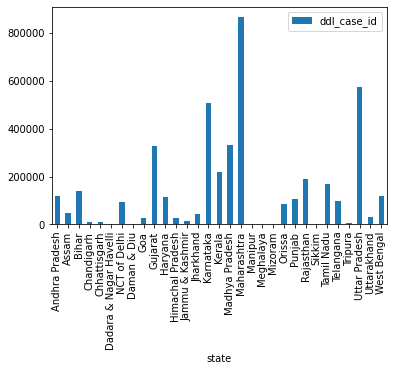

In [47]:
state_count.plot(x="state",y="ddl_case_id", kind="bar")
plt.pyplot.savefig('state_bar_2010.png')

In [35]:
shp = gpd.read_file('/kaggle/input/indian-stat/Indian_states.shp')
state_map = shp.set_index('st_nm').join(state_count.set_index('state'))
print(state_map)

                                                                   geometry  \
st_nm                                                                         
Andaman & Nicobar Island  MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2...   
Arunanchal Pradesh        POLYGON ((96.16261 29.38078, 96.16860 29.37432...   
Assam                     MULTIPOLYGON (((89.74323 26.30362, 89.74290 26...   
Bihar                     MULTIPOLYGON (((84.50720 24.26323, 84.50355 24...   
Chandigarh                POLYGON ((76.84147 30.75996, 76.83599 30.73623...   
Chhattisgarh              POLYGON ((83.33532 24.09885, 83.35346 24.09627...   
Dadara & Nagar Havelli    POLYGON ((73.20657 20.12216, 73.20797 20.10650...   
Daman & Diu               MULTIPOLYGON (((72.89335 20.44539, 72.89281 20...   
Goa                       MULTIPOLYGON (((74.11918 14.75344, 74.11350 14...   
Gujarat                   MULTIPOLYGON (((71.70375 20.99958, 71.70375 20...   
Haryana                   POLYGON ((76.85065 30.8751

In [37]:
 state_map['ddl_case_id'] = state_map['ddl_case_id'].fillna(0)

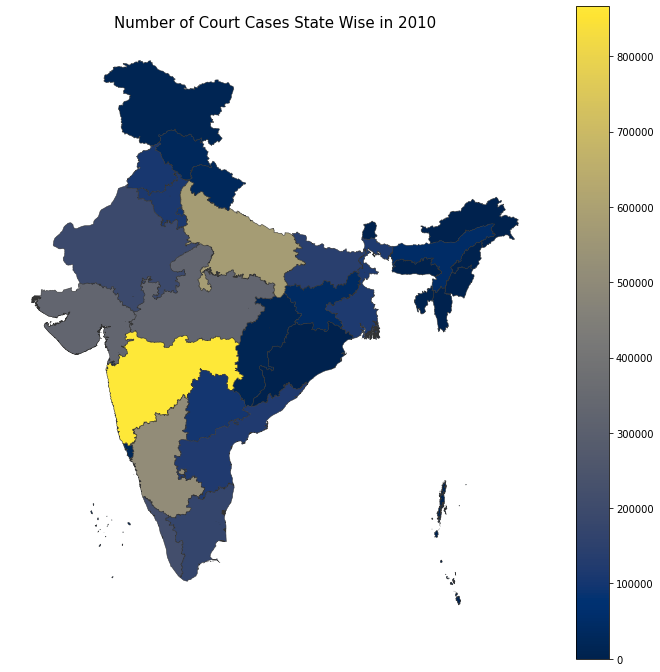

In [48]:
fig, ax = plt.pyplot.subplots(1, figsize=(12, 12))
ax.axis('off')
ax.set_title('Number of Court Cases State Wise in 2010',
             fontdict={'fontsize': '15', 'fontweight' : '3'})
fig = state_map.plot(column='ddl_case_id', cmap='cividis', linewidth=0.5, ax=ax, edgecolor='0.2',legend=True)

plt.pyplot.savefig('state_map_2010.png')

In [42]:
state_2010 = state_map.iloc[:,[1]]
print(state_2010)

                          ddl_case_id
st_nm                                
Andaman & Nicobar Island          0.0
Arunanchal Pradesh                0.0
Assam                         47906.0
Bihar                        140198.0
Chandigarh                    10317.0
Chhattisgarh                  10230.0
Dadara & Nagar Havelli          616.0
Daman & Diu                     480.0
Goa                           25292.0
Gujarat                      328872.0
Haryana                      114535.0
Himachal Pradesh              28541.0
Jammu & Kashmir               12457.0
Jharkhand                     42990.0
Karnataka                    507691.0
Kerala                       217526.0
Lakshadweep                       0.0
Madhya Pradesh               331567.0
Maharashtra                  866279.0
Manipur                         685.0
Meghalaya                       916.0
Mizoram                         311.0
Nagaland                          0.0
NCT of Delhi                  94972.0
Puducherry  

In [44]:
state_2010.to_csv('state_2010.csv')